## Working with SBML Ids
Usually basico uses the COPASI display names, to work with model elements. That way a consistent naming scheme between the COPASI graphical user interface, and the scripts can be easily maintained. However, for someone inspecting an SBML model, it might be convenient to also look at the SBML ids and identify elements that way. For this reason the data frames returned for compartments, events, parameters, species and reactions now also contain a column `sbml_id`. 

Lets start as usual with the common imports: 

In [1]:
import sys
if '../..' not in sys.path:
    sys.path.append('../..')
from basico import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next lets load a model from the BioModels Database, and look at the elments: 

In [2]:
load_biomodel(64);

Now we have not just the element name availabe, but also their respective `sbml_id`:

In [3]:
get_species()[['sbml_id', 'initial_concentration']]

,sbml_id,initial_concentration
name,,
High energy phosphates,P,6.310000
Glucose 6 Phosphate,G6P,2.450000
Triose-phosphate,TRIO,0.960000
NAD,NAD,1.200000
Acetaldehyde,ACE,0.170000
2-phosphoglycerate,P2G,0.120000
"1,3-bisphosphoglycerate",BPG,0.000000
Glucose in Cytosol,GLCi,0.087000
Fructose 6 Phosphate,F6P,0.620000


similarly we can get the elements by SBML id as well: 

In [4]:
get_species(sbml_id='ATP')

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id
name,,,,,,,,,,,,,
ATP concentration,cytosol,assignment,mmol/l,2.50919,1.511070e+21,,( [High energy phosphates] - [ADP concentratio...,NaN,NaN,NaN,NaN,Metabolite_21,ATP


Whereas in COPASI each element has a concentration and a particle number, in SBML usually elements deal only with concentrations and amounts. To make it easy to access them, it is convenient to add the expressions for the amount to the model, so that they can be accessed at any point in time. For that a utility function exists. If `use_sbml_ids` is specified, the sbml id of the species will be used in the name (i.e: `amount(sbml_id)`), otherwise it will be named `amount(display name)`. In case `ignore_fixed` is specified, no expressions for fixed species will be created, and similarly assignment expressions can be ignored:

In [5]:
add_amount_expressions(use_sbml_ids=True, ignore_fixed=True)

lets look at the expressions created, we see it is just the concentration multiplied with the compartment size the species is in:

In [6]:
get_parameters(name='amount(')[['initial_value', 'expression']]

,initial_value,expression
name,,
amount(GLCi),0.087000,[Glucose in Cytosol] * Compartments[cytosol].V...
amount(G6P),2.450000,[Glucose 6 Phosphate] * Compartments[cytosol]....
amount(F6P),0.620000,[Fructose 6 Phosphate] * Compartments[cytosol]...
amount(F16P),5.510000,"[Fructose-1,6 bisphosphate] * Compartments[cyt..."
amount(TRIO),0.960000,[Triose-phosphate] * Compartments[cytosol].Volume
amount(BPG),0.000000,"[1,3-bisphosphoglycerate] * Compartments[cytos..."
amount(P3G),0.900000,[3-phosphoglycerate] * Compartments[cytosol].V...
amount(P2G),0.120000,[2-phosphoglycerate] * Compartments[cytosol].V...
amount(PEP),0.070000,[Phosphoenolpyruvate] * Compartments[cytosol]....


the `run_time_course` function now also takes a parameter to use sbml id's if they are present (it will still use the display names in case an element has no sbml id.

In [7]:
run_time_course(use_sbml_id=True)

,P,G6P,TRIO,NAD,ACE,P2G,BPG,GLCi,F6P,PEP,...,Values[amount(P2G)],Values[amount(PEP)],Values[amount(PYR)],Values[amount(ACE)],Values[amount(P)],Values[amount(NAD)],Values[amount(NADH)],Values[amount(ATP)],Values[amount(ADP)],Values[amount(AMP)]
Time,,,,,,,,,,,,,,,,,,,,,
0.00,6.310000,2.450000,0.960000,1.200000,0.170000,0.120000,0.000000,0.087000,0.620000,0.070000,...,0.120000,0.070000,1.850000,0.170000,6.310000,1.200000,0.390000,2.509190,1.291619,0.299190
0.01,6.530115,2.491309,2.325367,1.055557,0.011908,0.051758,0.000412,0.097408,0.351027,0.075957,...,0.051758,0.075957,3.176736,0.011908,6.530115,1.055557,0.534443,2.669381,1.191352,0.239267
0.02,6.481760,2.428287,2.355642,1.010053,0.012240,0.039849,0.000327,0.097234,0.341946,0.062268,...,0.039849,0.062268,3.864468,0.012240,6.481760,1.010053,0.579947,2.633713,1.214334,0.251953
0.03,6.419771,2.357805,2.326751,1.033128,0.013500,0.040591,0.000326,0.099157,0.328112,0.062661,...,0.040591,0.062661,4.355273,0.013500,6.419771,1.033128,0.556872,2.588384,1.243002,0.268613
0.04,6.465266,2.295451,2.288924,1.076765,0.015151,0.043923,0.000361,0.098315,0.323283,0.068018,...,0.043923,0.068018,4.792030,0.015151,6.465266,1.076765,0.513235,2.621609,1.222048,0.256343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.96,6.470716,1.124734,0.799562,1.550632,0.195576,0.049470,0.000391,0.094281,0.127878,0.084961,...,0.049470,0.084961,9.734328,0.195576,6.470716,1.550632,0.039368,2.625605,1.219506,0.254889
0.97,6.463801,1.120309,0.798489,1.550554,0.195101,0.049284,0.000388,0.094464,0.127152,0.084495,...,0.049284,0.084495,9.698833,0.195101,6.463801,1.550554,0.039446,2.620535,1.222730,0.256734
0.98,6.457177,1.116112,0.797470,1.550473,0.194615,0.049106,0.000385,0.094640,0.126464,0.084049,...,0.049106,0.084049,9.663914,0.194615,6.457177,1.550473,0.039527,2.615684,1.225809,0.258507


In [8]:
df = run_time_course()

so lets plot just the amounts we got:

In [9]:
amount_columns = list(df.columns)
amount_columns = [name for name in amount_columns if 'amount(' in name]

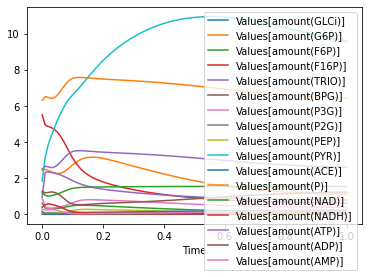

In [10]:
df[amount_columns].plot();

of course the added global parameters can be easily removed: 

In [11]:
remove_amount_expressions()

and now we can plot the concentrations:

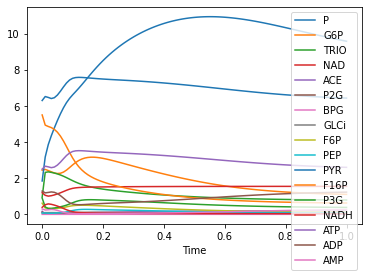

In [14]:
run_time_course(use_sbml_id=True).plot();